# 0. Setup Paths

In [28]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
for path in paths.values():
        if os.name == 'nt':
            !mkdir {path}

A subdirectory or file Tensorflow\workspace already exists.
A subdirectory or file Tensorflow\scripts already exists.
A subdirectory or file Tensorflow\models already exists.
A subdirectory or file Tensorflow\workspace\annotations already exists.
A subdirectory or file Tensorflow\workspace\images already exists.
A subdirectory or file Tensorflow\workspace\models already exists.
A subdirectory or file Tensorflow\workspace\pre-trained-models already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\export already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport already exists.
A subdirectory or file Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport already exists.
A subdirectory or file Tensorflow\protoc already exists.


# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [29]:
import wget

You should consider upgrading via the 'c:\users\amanpreet singh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  40% (1005/2485)
Updating files:  41% (1019/2485)
Updating files:  42% (1044/2485)
Updating files:  43% (1069/2485)
Updating files:  44% (1094/2485)
Updating files:  45% (1119/2485)
Updating files:  46% (1144/2485)
Updating files:  47% (1168/2485)
Updating files:  48% (1193/2485)
Updating files:  49% (1218/2485)
Updating files:  50% (1243/2485)
Updating files:  51% (1268/2485)
Updating files:  52% (1293/2485)
Updating files:  53% (1318/2485)
Updating files:  54% (1342/2485)
Updating files:  55% (1367/2485)
Updating files:  56% (1392/2485)
Updating files:  57% (1417/2485)
Updating files:  58% (1442/2485)
Updating files:  59% (1467/2485)
Updating files:  60% (1491/2485)
Updating files:  61% (1516/2485)
Updating files:  62% (1541/2485)
Updating files:  63% (1566/2485)
Updating files:  64% (1591/2485)
Updating files:  65% (1616/2485)
Updating files:  66% (1641/2485)
Updating files:  67% (1665/2485)
Updating files:  68% (1690/2485)
Updatin

In [15]:
# Install Tensorflow Object Detection 
 if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
c:\users\amanpreet singh\appdata\local\temp\easy_install-ypizy54_\pycocotools-2.0.2\.eggs\cython-0.29.23-py3.8-win-amd64.egg\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\AMANPR~1\AppData\Local\Temp\easy_install-ypizy54_\pycocotools-2.0.2\pycocotools\_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
error: [WinError 5] Access is denied: 'C:\\Users\\AMANPR~1\\AppData\\Local\\Temp\\easy_install-ypizy54_\\pycocotools-2.0.2\\.eggs\\Cython-0.29.23-py3.8-win-amd64.egg\\Cython\\Compiler\\FlowControl.cp38-win_amd64.pyd'



copying object_detection\protos\matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\mean_stddev_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\model_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\multiscale_anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\optimizer_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\pipeline_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\post_processing_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\preprocessor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\region_similarity_calculator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\square_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\ssd_anchor_generator_pb2.py -> build\lib\object_d

Obtaining file:///D:/CV/TFODCourse/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [24]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


9379840/9406464 [============================>.] - ETA: 0s


2021-06-12 17:05:27.146292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-12 17:05:27.146998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.8.8: C:\Users\Amanpreet singh\AppData\Local\Programs\Python\Python38\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-12 17:05:34.635184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-12 17:05:34.636360: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-12 17:05:34.657940: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-FF9SCUC6
2021-06-12 17:05:34.659469: I tensorflow/strea

9412608/9406464 [==============================] - 2s 0us/step



I0612 17:05:56.381487  9852 efficientnet_model.py:147] round_filter input=16 output=16
I0612 17:05:56.654646  9852 efficientnet_model.py:147] round_filter input=16 output=16
I0612 17:05:56.654646  9852 efficientnet_model.py:147] round_filter input=24 output=24
I0612 17:05:57.195766  9852 efficientnet_model.py:147] round_filter input=24 output=24
I0612 17:05:57.195766  9852 efficientnet_model.py:147] round_filter input=40 output=48
I0612 17:05:57.764666  9852 efficientnet_model.py:147] round_filter input=40 output=48
I0612 17:05:57.764666  9852 efficientnet_model.py:147] round_filter input=80 output=88
I0612 17:05:58.543656  9852 efficientnet_model.py:147] round_filter input=80 output=88
I0612 17:05:58.543656  9852 efficientnet_model.py:147] round_filter input=112 output=120
I0612 17:05:59.294750  9852 efficientnet_model.py:147] round_filter input=112 output=120
I0612 17:05:59.294750  9852 efficientnet_model.py:147] round_filter input=192 output=208
I0612 17:06:00.318286  9852 efficien

In [17]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires Pillow, which is not installed.
tf-models-official 2.5.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.0 requires pycocotools, which is not instal

In [13]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-3.17.3-py2.py3-none-any.whl (173 kB)
  Using cached matplotlib-3.2.0-cp38-cp38-win_amd64.whl (9.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2cli

In [23]:
!pip install pyyaml



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.0 requires Cython, which is not installed.
tf-models-official 2.5.0 requires gin-config, which is not installed.
tf-models-official 2.5.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.5.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.5.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.5.0 requires oauth2client, which is not installed.
tf-models-official 2.5.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.5.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.5.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.5.0 requires pycocotools, which is not installed.
tf-models-official 2.5.0 requires sacrebleu, which is not ins

tf-models-official 2.5.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.5.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.5.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.5.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.


In [30]:
import object_detection

In [9]:
!pip list

Package                 Version
----------------------- -------------------
absl-py                 0.12.0
appdirs                 1.4.4
argon2-cffi             20.1.0
asgiref                 3.4.1
astunparse              1.6.3
async-generator         1.10
attrs                   21.2.0
backcall                0.2.0
bleach                  3.3.0
cachetools              4.2.2
certifi                 2021.5.30
cffi                    1.14.5
chardet                 4.0.0
colorama                0.4.4
cycler                  0.10.0
Cython                  0.29.23
decorator               5.0.9
defusedxml              0.7.1
distlib                 0.3.2
Django                  3.2.5
entrypoints             0.3
filelock                3.0.12
flatbuffers             1.12
gast                    0.4.0
gin-config              0.1.1
google-auth             1.31.0
google-auth-oauthlib    0.4.4
google-pasta            0.2.0
grpcio                  1.32.0
h5py                    2.10.0
idna         

You should consider upgrading via the 'c:\users\amanpreet singh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.



prometheus-client       0.11.0
prompt-toolkit          3.0.18
protobuf                3.17.3
pyasn1                  0.4.8
pyasn1-modules          0.2.8
pycocotools-windows     2.0.0.2
pycparser               2.20
Pygments                2.9.0
pyparsing               2.4.7
PyQt5                   5.15.4
PyQt5-Qt5               5.15.2
PyQt5-sip               12.9.0
pyrsistent              0.17.3
python-dateutil         2.8.1
pytz                    2021.1
pywin32                 301
pywinpty                1.1.2
PyYAML                  5.4.1
pyzmq                   22.1.0
requests                2.25.1
requests-oauthlib       1.3.0
rsa                     4.7.2
scipy                   1.7.0rc1
Send2Trash              1.5.0
setuptools              49.2.1
six                     1.15.0
sqlparse                0.4.1
tensorboard             2.5.0
tensorboard-data-server 0.6.1
tensorboard-plugin-wit  1.8.0
tensorflow              2.5.0
tensorflow-addons       0.13.0
tensorflow-estimator    

In [10]:
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
labels = [{'name':'Mask', 'id':1}, {'name':'No_Mask', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [12]:
!pip install pytz


You should consider upgrading via the 'c:\users\amanpreet singh\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [11]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [7]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [8]:
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [31]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [10]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [11]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [12]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [13]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [14]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [15]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [16]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [19]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
!{command}

# 7. Evaluate the Model

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [32]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [20]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [33]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'WIN_20200318_.jpg')

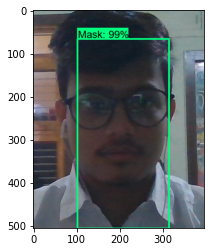

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [26]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202